<div style="direction:rtl">
در ابتدا، کتاخانه‌هایی که در طول پروژه به آن‌ها نیاز خواهیم داشت را اضافه می‌کنیم.
</div>

In [1]:
import numpy as np
import pandas as pd 
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

<div style="direction:rtl">
دیتاست را از روی فایل خوانده و ابعاد و چند سطر اول آن را نمایش می‌دهیم.
</div>

In [2]:
df = pd.read_csv('train_dataset.csv')
print(f'dataset shape: {df.shape}')
df.head()

dataset shape: (100000, 23)


,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,-1.0,-1,2020-08-04 04:07:56,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,-1,E3DDEB04F8AFF944B11943BB57D2F620,5E2C678F6586B67F61A377E1534E01FC
1,0,-1.0,-1,2020-08-04 01:47:40,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,-1,E3DDEB04F8AFF944B11943BB57D2F620,E8247702C0DD294E0AE6B5B5E2F9E810
2,0,-1.0,-1,2020-08-04 16:54:31,-1,0.0,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,-1,C45A9AC6D102ACAEEDF0D6F78636D84A,...,-1,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5,9FD001258907F541D497040C64383696
3,0,-1.0,-1,2020-08-03 20:34:28,-1,0.0,-1,D7D1FB49049702BF6338894757E0D959,-1,-1,...,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,-1,E3DDEB04F8AFF944B11943BB57D2F620,225741ACF2DBB2E5948268F5D5D352E6
4,0,-1.0,-1,2020-08-03 20:54:17,1064,0.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,-1,1B491180398E2F0390E6A588B3BCE291,...,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,-1,-1,-1,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863,160A90377E54124D0BD31DB6735F0B33


<div>
    <h1>EDA & Feature Engineering</h1>
    <hr>
</div>

<div style="direction:rtl">
نوع داده‌ی هر ستون از دیتاست در زیر مشخص شده است. ستون‌های از جنس
    object
    در واقع همان ستون‌های کتگوریکال در داده‌ها هستند. مشاهده می‌کنیم که اکثر ستون‌های داده از جنس کتگوریکال و تعداد کمی از جنس عددی هستند.
</div>

In [3]:
df.dtypes

Sale                           int64
SalesAmountInEuro            float64
time_delay_for_conversion      int64
click_timestamp               object
nb_clicks_1week                int64
product_price                float64
product_age_group             object
device_type                   object
audience_id                   object
product_gender                object
product_brand                 object
product_category(1)           object
product_category(2)           object
product_category(3)           object
product_category(4)           object
product_category(5)           object
product_category(6)           object
product_category(7)            int64
product_country               object
product_id                    object
product_title                 object
partner_id                    object
user_id                       object
dtype: object

<div style="direction:rtl">
در دو قسمت بعدی به ترتیب تعداد مقادیر یکتای هر ستون و تعداد خانه‌های درای مقدار
    Nan
    را بررسی می‌کنیم. برخی از ستون‌ها مانند
    click_timestamp, product_id, product_title, user_id
    از تعداد بیشتری مقادیر متمایز به نسبت سایر ستون‌ها برخوردارند.
    <br>
    در ضمن فقط ستون
    product_title
    دارای تعدادی مقدار
    Nan
    به صورت صریح است و باید مقادیر دیگر را به عنوان داده‌های 
    missing
    برای سایر ستون‌ها بررسی کنیم.
</div>

In [4]:
df.nunique(axis = 0)

Sale                             2
SalesAmountInEuro             8932
time_delay_for_conversion     9208
click_timestamp              67045
nb_clicks_1week               1138
product_price                 4496
product_age_group                9
device_type                      4
audience_id                   3182
product_gender                  11
product_brand                 4770
product_category(1)             22
product_category(2)            145
product_category(3)            699
product_category(4)            910
product_category(5)            442
product_category(6)             89
product_category(7)              1
product_country                 17
product_id                   45447
product_title                27695
partner_id                     183
user_id                      96766
dtype: int64

In [5]:
print(f'number of records: {len(df.index)}\n')
print('number of missing values in each column:')
print(df.isna().sum())

number of records: 100000

number of missing values in each column:
Sale                           0
SalesAmountInEuro              0
time_delay_for_conversion      0
click_timestamp                0
nb_clicks_1week                0
product_price                  0
product_age_group              0
device_type                    0
audience_id                    0
product_gender                 0
product_brand                  0
product_category(1)            0
product_category(2)            0
product_category(3)            0
product_category(4)            0
product_category(5)            0
product_category(6)            0
product_category(7)            0
product_country                0
product_id                     0
product_title                261
partner_id                     0
user_id                        0
dtype: int64


<div style="direction:rtl">
اطلاعات آماری کلی ستون‌های عددی داده‌ها را در زیر بررسی می‌کنیم.
    با توجی به این آمار، ستون 
    product_category(7)
    تماما از مقادیر 
    ۱-
    تشکیل شده است. همچنین در سایر ستون‌ها به جز
    Sale
    و
    nb_clicks_1week
    بخش زیادی (حداقل 75 درصد)
    از داده‌ها یک مقدار ثابت که به نظر همان مقدار متناظر با 
    missing value
    است را دارند.
</div>

In [6]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Sale,SalesAmountInEuro,time_delay_for_conversion,nb_clicks_1week,product_price,product_category(7)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.136610,15.124148,43724.282270,236.545830,10.929187,-1.000000
std,0.343437,147.248702,243408.653698,1153.037285,65.574247,0.000000
min,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000
75%,0.000000,-1.000000,-1.000000,49.000000,0.000000,-1.000000
max,1.000000,23691.224980,2554631.000000,25390.000000,3928.000000,-1.000000


<div style="direction:rtl">
در ۳ بخش بعد تعداد مقادیر ناموجود برای ستون‌های مختلف را بررسی می‌کنیم. برای ستون‌های عددی به جز
    product_price
    مقدار
    ۱-
    ،
    برای ستون‌های کتگوریکال مقدار
    '1-'
    به معنی ناموجود و برای ستون
    product_price
    مقدار
    0
    به معنی ناموجود است.
</div>

In [7]:
df[df == -1].count()

Sale                              0
SalesAmountInEuro             86339
time_delay_for_conversion     86394
click_timestamp                   0
nb_clicks_1week               46060
product_price                     0
product_age_group                 0
device_type                       0
audience_id                       0
product_gender                    0
product_brand                     0
product_category(1)               0
product_category(2)               0
product_category(3)               0
product_category(4)               0
product_category(5)               0
product_category(6)               0
product_category(7)          100000
product_country                   0
product_id                        0
product_title                     0
partner_id                        0
user_id                           0
dtype: int64

In [8]:
df[df == '-1'].count()

Sale                             0
SalesAmountInEuro                0
time_delay_for_conversion        0
click_timestamp                  0
nb_clicks_1week                  0
product_price                    0
product_age_group            75603
device_type                     39
audience_id                  71793
product_gender               75554
product_brand                65800
product_category(1)          45502
product_category(2)          45517
product_category(3)          52316
product_category(4)          71222
product_category(5)          92009
product_category(6)          98832
product_category(7)              0
product_country              23754
product_id                   23714
product_title                45502
partner_id                       0
user_id                          0
dtype: int64

In [9]:
df[df == 0].count()

Sale                         86339
SalesAmountInEuro              697
time_delay_for_conversion        0
click_timestamp                  0
nb_clicks_1week               5370
product_price                87216
product_age_group                0
device_type                      0
audience_id                      0
product_gender                   0
product_brand                    0
product_category(1)              0
product_category(2)              0
product_category(3)              0
product_category(4)              0
product_category(5)              0
product_category(6)              0
product_category(7)              0
product_country                  0
product_id                       0
product_title                    0
partner_id                       0
user_id                          0
dtype: int64

<div style="direction:rtl">
دو ستون
    SalesAmountInEuro
    و
    time_delay_for_conversion
    به این صورت هستند که اگر لیبل خروجی ۱ باشد این دو ستون دارای مقدار و در غیر این صورت ناموجود هستند و بنابراین وابستگی کاملی بین این دو ستون و ستون لیبل است و عملا این دو ستون خود نقش لیبل هم دارند. پس نیاز است آن‌ها را حذف کنیم چون نمی‌توانیم از آن‌ها در عمل یادگیری و پیش‌بینی استفاده کنیم.
    <br>
    ستون‌های 
    user_id
    و
    audience_id
    در واقع صرفا شناسه‌ای برای کاربرها هستند و نمی‌توانند در پیش‌بینی کلیک‌شدن روی تبلیغ به ما کمکی کنند. این موضوع از تعداد بالای مقادیر یکتای ستون
    user_id
    و از تعداد زیاد مقادیر ناموجود
    audiendce_id
    نیز مشهود است. پس این دو ستون را نیز حذف می‌کنیم.
    ستون
    product_category(7)
    نیز مقادیر تماما
    1-
    دارد و زائد است.
    در بین ستون‌های عددی، ستون
    product_price
    بیش از ۸۷ درصد داده ناموجود دارد که عملا آن را غیر قابل استفاده می‌کند و جایگزینی آن با معیارهایی همچون میانه یا میانگین نیز نمی‌تواند اثربخشی زیادی داشته باشد. این ستون نیز به حذفیات اضافه می‌شود.
    <br>
    در نهایت ابعاد دیتاست به صورت زیر می‌شود:
</div>

In [10]:
df_cleaned = df.drop(['SalesAmountInEuro', 'time_delay_for_conversion', 'product_price', 'audience_id', 'user_id', 'product_category(7)'], axis = 1)
df_cleaned = df_cleaned.replace(['-1', -1], np.nan)
print(df_cleaned.shape)
df_cleaned.head()

(100000, 17)


,Sale,click_timestamp,nb_clicks_1week,product_age_group,device_type,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_country,product_id,product_title,partner_id
0,0.0,2020-08-04 04:07:56,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,NaN,E3DDEB04F8AFF944B11943BB57D2F620
1,0.0,2020-08-04 01:47:40,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,NaN,E3DDEB04F8AFF944B11943BB57D2F620
2,0.0,2020-08-04 16:54:31,NaN,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5
3,0.0,2020-08-03 20:34:28,NaN,NaN,D7D1FB49049702BF6338894757E0D959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,NaN,E3DDEB04F8AFF944B11943BB57D2F620
4,0.0,2020-08-03 20:54:17,1064.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,NaN,NaN,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863


<div style="direction:rtl">
بعد از انجام این عملیات‌ها تعداد مقادیر ناموجود به صورت زیر خواهد شد:
</div>

In [11]:
df_cleaned.isna().sum()

Sale                       0
click_timestamp            0
nb_clicks_1week        46060
product_age_group      75603
device_type               39
product_gender         75554
product_brand          65800
product_category(1)    45502
product_category(2)    45517
product_category(3)    52316
product_category(4)    71222
product_category(5)    92009
product_category(6)    98832
product_country        23754
product_id             23714
product_title          45763
partner_id                 0
dtype: int64

<div style="direction:rtl">
سطرهایی که تعداد خیلی بالایی داده ناموجود دارند عملا برای انجام یادگیری کاربرد زیادی نخواهند داشت و حذف آن‌ها می‌تواند عملکرد و پرفورمنس یادگیری را افزایش دهد. یک حد نصاب ۱۲ تایی برای مقادیر ناموجود هر سطر در نظر می‌کیریم و هر سطر با این تعداد یا بیشتر مقدار ناموجود را حذف می‌کنیم.
    با توجه به اینکه ۳ تا از ستون‌ها هیچ مقدار ناموجودی ندارند، عملا هر سطری که از بین ۱۴ ستون باقی‌مانده حداقل ۱۲ مقدار ناموجود دارد حذف می‌شود که به نظر حد نصاب خوبی است. با این عمل حدود ۲۴۰۰۰ سطر از داده‌ها حذف می‌شوند که عدد قابل تاملی است.
</div>

In [12]:
threshold = 12
to_be_removed_indx = []
for index, row in df_cleaned.iterrows():
  nulls = 0
  for i in row.keys():
    if pd.isnull(row[i]):
      nulls += 1
  if nulls >= threshold:
    to_be_removed_indx.append(index)

df_clean = df_cleaned.drop(to_be_removed_indx)
df_clean.shape

(76246, 17)

<div style="direction:rtl">
برای اینکه مدل یادگیری ما بتواند استفاده بهتری از مقدار 
    click_timestamp
    ببرد، آن را از حالت رشته‌ای خارج می‌کنیم. به این صورت که اجزای مهم تاریخ و زمان را هرکدام جداگانه در یک ستون عددی قرار می‌دهیم. با توجه به اینکه این داده‌ها کلا برای دو روز پشت سر هم هستند، از تاریخ فقط روز را نگه می‌داریم. از زمان نیز، مهم‌ترین عامل  در خرید مردم، بازه‌های ساعتی است و دقیقه و ثانیه با اینکه ظرافت بیشتری دارند اما اطلاعات اضافه‌تر یا مفیدتر خاصی در اختیار ما قرار نمی‌دهند. پس از زمان هم صرفا ساعت کلیک شدن را جدا می ‌کنیم. در نهایت ستون
    click_timestamp
    را از دیتاست حذف می‌کنیم.
</div>

In [13]:
def part_date_time(time_s: str):
  date, time = time_s.split(' ')
  day = int(date.split('-')[-1])
  hour = int(time.split(':')[0])
  return pd.Series({'click_day': day, 'click_hour': hour})

df_clean = df_clean.merge(df_clean['click_timestamp'].apply(lambda t: part_date_time(t)), left_index=True, right_index=True)
df_clean = df_clean.drop('click_timestamp', axis=1)
df_clean.head()

,Sale,nb_clicks_1week,product_age_group,device_type,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_country,product_id,product_title,partner_id,click_day,click_hour
0,0.0,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,NaN,E3DDEB04F8AFF944B11943BB57D2F620,4,4
1,0.0,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,NaN,E3DDEB04F8AFF944B11943BB57D2F620,4,1
2,0.0,NaN,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5,4,16
3,0.0,NaN,NaN,D7D1FB49049702BF6338894757E0D959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,NaN,E3DDEB04F8AFF944B11943BB57D2F620,3,20
4,0.0,1064.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,NaN,NaN,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863,3,20


<div style="direction:rtl">
برای ستون‌های کتگوریکال، ۵ مقدار با بیشترین بسامد و تعداد تکرار هر یک را نمایش می‌دهیم. با توجه به ماهیت ستون‌ها، تعداد تکرار این مقادیر، فاصله خیلی زیاد و غیرقابل‌قبولی ندارند و نسبتا صحت دارند.
</div>

In [14]:
numerical_columns = df_clean.select_dtypes(exclude='object')
categorical_columns = df_clean.select_dtypes(include='object')

for col in categorical_columns.columns:
    print(f'{col} most frequent values:')
    print(df_clean[col].value_counts().sort_values(ascending=False).head(5))
    print()

product_age_group most frequent values:
4C90FD52FC53D2C1C205844CB69575AB    17915
88460293E9517D21E39AA889BD5AADC8     2770
921B36149E5B081FD24450BFE2CE4430     2386
0CD76C7030D0900BE250C8D41703D180      892
538912C31E773613AB51FBAE58492476      235
Name: product_age_group, dtype: int64

device_type most frequent values:
7E56C27BFF0305E788DA55A029EC4988    42043
D7D1FB49049702BF6338894757E0D959    27885
FF2C446555E3822B0E0FC3406116E86D     6318
Name: device_type, dtype: int64

product_gender most frequent values:
A5D15FC386510762EC0DDFF54ABE6F94    11710
1B491180398E2F0390E6A588B3BCE291     8499
C45A9AC6D102ACAEEDF0D6F78636D84A     3225
D7B42B0C4D807EF1C13F79948743E9DA      564
28F311FA00BD3B4D076659D87EE3AE8D      191
Name: product_gender, dtype: int64

product_brand most frequent values:
B11F83250E97B9AE77366F23AD8D8567    2110
E96F5BEE9F0B4E2B7091F58CFE499E60     682
ED0D37301B0A41E480084DE7D47FC586     498
9E0EAAF455B7E51AE375D9CA77041CE4     447
F8A8F693508CE1173DD0AE648FBC1FF3   

In [15]:
df_clean.nunique()

Sale                       2
nb_clicks_1week         1137
product_age_group          8
device_type                3
product_gender            10
product_brand           4769
product_category(1)       21
product_category(2)      144
product_category(3)      698
product_category(4)      909
product_category(5)      441
product_category(6)       88
product_country           16
product_id             45417
product_title          27694
partner_id               168
click_day                  2
click_hour                24
dtype: int64

<div style="direction:rtl">
با توجه به تعداد مقادیر یکتای هر ستون در بالا، اگر بخواهیم تمام این مقادیر را در عملیات
    One hot encodeing
    دخالت دهیم، تعداد ستون‌ها بسیار زیاد شده و در حدود ۷۵ هزار ستون و ۷۶ هزار سطر خواهیم داشت و با توجه به حجم فعلی دیتاست که حدود ۱۳ مگابایت است، پس از عملیات حجم آن به چند ده گیگابایت می‌رسد که از توان مموری ما خارج است و عملا کار با آن ناممکن می‌شود. پس مجبوریم به ازای هر ستون کتگوریکال، مقادیر یکتای پربسامد آن را تا یک حداکثر تعداد مشخصی که در اینجا ۵۰۰ است در عملیات انکودینگ دخیل کرده و از مقادیر خارج از این ۵۰۰ مقدار پرتکرار اول صرف نظر کنیم که عملا چون تعداد داده‌هایی که این مقادیر را دارند بسیار نسبت به آن ۵۰۰ مقدار اول اندک هستند که قابل صرف نظر می‌باشند. هر سطری که مقدارش در آن ستون ناموجود یا خارج از آن حداکثر ۵۰۰ مقدار باشد در عملیات انکودینگ،‌ستون‌های متناظر تماما 0 خواهد داشت.
</div>

In [16]:
def one_hot_encode(data, col, top_x):
    labels = [x for x in data[col].value_counts().sort_values(ascending=False).head(top_x).index]
    for label in labels:
        data[col+'_'+label] = np.where(data[col]==label,1,0)
    # data = data.join(pd.get_dummies(data[col], prefix=str(col))).drop(col, axis=1)

columns = list(categorical_columns.columns)
for col in columns:
    one_hot_encode(df_clean, col, min(500, df_clean[col].nunique()))

print(df_clean.shape)
df_clean.head()

(76246, 3417)


,Sale,nb_clicks_1week,product_age_group,device_type,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),...,partner_id_41698507CB5DD54DC9C599E5C03BA9C8,partner_id_EB56C4AA9117C45E651F0BBC8B501F14,partner_id_65BE412B627B5238D9E1171D1E703AEE,partner_id_FE1653DA62B96FA58F9130959F9AAF24,partner_id_83E25F2B5B2FE35217739656A9668861,partner_id_BC24F033D166444EEB6CC79BF6213A72,partner_id_2AAA4123BE41F050F159BD574800464F,partner_id_056906B0FA5C6FA20341447DE45B24A7,partner_id_E0E30331BB16EE48CC654D385016E14C,partner_id_913A7F7053B85ACBCCB6CFCEF98DD79A
0,0.0,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,0.0,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,0.0,NaN,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,0.0,NaN,NaN,D7D1FB49049702BF6338894757E0D959,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1064.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,...,0,0,0,0,0,0,0,0,0,0


<div style="direction:rtl">
پس از اجرای انکودینگ و حذف ستون‌های کتگوریکال اولیه، شکل دیتاست به صورت زیر خواهد شد. در این مرحله تمام ستون‌ها عددی هستند.
</div>

In [17]:
df_clean = df_clean.drop(columns, axis=1)
df_clean.shape

(76246, 3403)

In [18]:
df_clean.isna().sum()

Sale                                                      0
nb_clicks_1week                                       22306
click_day                                                 0
click_hour                                                0
product_age_group_4C90FD52FC53D2C1C205844CB69575AB        0
                                                      ...  
partner_id_BC24F033D166444EEB6CC79BF6213A72               0
partner_id_2AAA4123BE41F050F159BD574800464F               0
partner_id_056906B0FA5C6FA20341447DE45B24A7               0
partner_id_E0E30331BB16EE48CC654D385016E14C               0
partner_id_913A7F7053B85ACBCCB6CFCEF98DD79A               0
Length: 3403, dtype: int64

<div style="direction:rtl">
باید مقادیر ناموجود ستون 
    nb_clicks_1week
    را نیز به روشی از بین ببریم. ابتدا نمودار جعبه‌ای این ستون داده را رسم می‌کنیم.
</div>

<AxesSubplot:xlabel='nb_clicks_1week'>

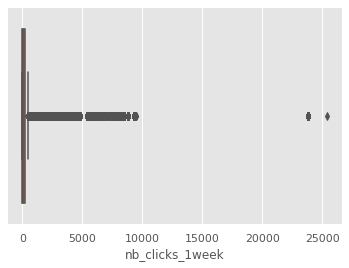

In [19]:
sns.boxplot(df_clean['nb_clicks_1week'])

<div style="direction:rtl">
    همان‌طور که از نمودار مشخص است، دسته‌ای از داده‌ها فاصله خیلی زیادی از محل اجتماع دیگر داده‌ها دارند و داده پرت محسوب می‌شوند. برای حذف آن از یک حد نصاب ۱۰۰۰۰ کلیکی استفاده می‌کنیم و داده‌های با بیشتر از این تعداد کلیک را به عنوان داده پرت به حالت ناموجود در می‌آوریم.
    <br>
    نهایتا داده‌های ناموجود این ستون را با مقدار میانگین مقادیر موجود ستون جایگزین می‌کنیم. در این حالت میانگین همچنین ثابت می‌ماند و چون داده‌های پرت حذف شده‌اند متاثر از آن‌ها نمی‌شود.
</div>

In [20]:
nb_clicks_1week_thresh = 10000
df_clean.loc[(df_clean['nb_clicks_1week'] > nb_clicks_1week_thresh), 'nb_clicks_1week'] = np.nan
df_clean['nb_clicks_1week'].fillna((df_clean['nb_clicks_1week'].mean()), inplace=True)

df_clean.head()

,Sale,nb_clicks_1week,click_day,click_hour,product_age_group_4C90FD52FC53D2C1C205844CB69575AB,product_age_group_88460293E9517D21E39AA889BD5AADC8,product_age_group_921B36149E5B081FD24450BFE2CE4430,product_age_group_0CD76C7030D0900BE250C8D41703D180,product_age_group_538912C31E773613AB51FBAE58492476,product_age_group_E7BD5A29457B8E92582951B586319A9C,...,partner_id_41698507CB5DD54DC9C599E5C03BA9C8,partner_id_EB56C4AA9117C45E651F0BBC8B501F14,partner_id_65BE412B627B5238D9E1171D1E703AEE,partner_id_FE1653DA62B96FA58F9130959F9AAF24,partner_id_83E25F2B5B2FE35217739656A9668861,partner_id_BC24F033D166444EEB6CC79BF6213A72,partner_id_2AAA4123BE41F050F159BD574800464F,partner_id_056906B0FA5C6FA20341447DE45B24A7,partner_id_E0E30331BB16EE48CC654D385016E14C,partner_id_913A7F7053B85ACBCCB6CFCEF98DD79A
0,0.0,400.715251,4,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,400.715251,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,400.715251,4,16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,400.715251,3,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1064.000000,3,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='nb_clicks_1week'>

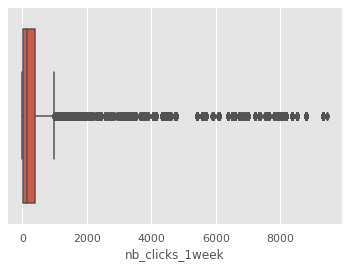

In [21]:
sns.boxplot(df_clean['nb_clicks_1week'])

<div style="direction:rtl">
در نهایت  وضعیت آماری ستون‌های داده به صورت زیر است:
</div>

In [22]:
df_clean.describe()

,Sale,nb_clicks_1week,click_day,click_hour,product_age_group_4C90FD52FC53D2C1C205844CB69575AB,product_age_group_88460293E9517D21E39AA889BD5AADC8,product_age_group_921B36149E5B081FD24450BFE2CE4430,product_age_group_0CD76C7030D0900BE250C8D41703D180,product_age_group_538912C31E773613AB51FBAE58492476,product_age_group_E7BD5A29457B8E92582951B586319A9C,...,partner_id_41698507CB5DD54DC9C599E5C03BA9C8,partner_id_EB56C4AA9117C45E651F0BBC8B501F14,partner_id_65BE412B627B5238D9E1171D1E703AEE,partner_id_FE1653DA62B96FA58F9130959F9AAF24,partner_id_83E25F2B5B2FE35217739656A9668861,partner_id_BC24F033D166444EEB6CC79BF6213A72,partner_id_2AAA4123BE41F050F159BD574800464F,partner_id_056906B0FA5C6FA20341447DE45B24A7,partner_id_E0E30331BB16EE48CC654D385016E14C,partner_id_913A7F7053B85ACBCCB6CFCEF98DD79A
count,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,...,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000,76246.000000
mean,0.137253,400.715251,3.580385,11.785681,0.234963,0.036330,0.031293,0.011699,0.003082,0.001862,...,0.000092,0.000092,0.000066,0.000039,0.000039,0.000026,0.000026,0.000013,0.000013,0.000013
std,0.344117,1019.920583,0.493499,7.093928,0.423979,0.187111,0.174111,0.107528,0.055432,0.043116,...,0.009581,0.009581,0.008098,0.006273,0.006273,0.005122,0.005122,0.003622,0.003622,0.003622
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,145.000000,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,400.715251,4.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,9444.000000,4.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="direction:rtl">
کاهش ابعاد داده:
</div>

In [23]:
y = df_clean['Sale'].to_numpy()
X = df_clean.drop('Sale', axis=1).to_numpy()

In [24]:
from sklearn.decomposition import PCA

PCA_N_COMP = 20
pca = PCA(n_components=PCA_N_COMP)
pca_projection = pca.fit(X)

singular_values = pca_projection.singular_values_
print(f'singular values:\n{singular_values}')

eigen_vectors = pca_projection.components_.T
print(f'\neigen vectors:\n{eigen_vectors}')

saved_variance = sum(pca_projection.explained_variance_ratio_) * 100
print(f'\nsaved variance: {saved_variance}%')

pca_projection = pca_projection.transform(X)

print(f'shape X: {X.shape}')
print(f'shape projection: {pca_projection.shape}')
print(f'shape y: {y.shape}')

singular values:
[2.81625566e+05 1.95951911e+03 2.27897980e+02 1.82605963e+02
 1.43315381e+02 1.32605688e+02 1.21426465e+02 1.16830893e+02
 1.10427506e+02 1.04333918e+02 9.20061755e+01 8.95625137e+01
 8.83219536e+01 8.03854573e+01 7.58266646e+01 7.49143333e+01
 7.31859971e+01 6.88547066e+01 6.77420298e+01 6.58188114e+01]

eigen vectors:
[[ 9.99999916e-01  2.80208938e-04 -9.45513672e-05 ... -1.25665546e-06
   9.58497522e-06  2.34027124e-05]
 [ 2.22057408e-05 -4.45125336e-02  2.16230318e-02 ... -4.61742677e-04
  -2.62672164e-03  9.10421641e-04]
 [-2.77536409e-04  9.98837291e-01  1.63655308e-02 ...  2.67930349e-04
   1.03748549e-03  2.59202759e-04]
 ...
 [-5.05235891e-09  2.10981588e-06  2.41152451e-05 ... -9.25529078e-05
  -1.68132857e-05 -1.24463587e-05]
 [-5.00191113e-09  1.06012185e-06  7.42414548e-06 ...  2.97311041e-06
   9.85487980e-06 -1.37562557e-05]
 [-5.03970685e-09 -1.01896465e-06  5.96569149e-06 ... -1.05542291e-07
   4.88371404e-05  6.89945645e-07]]

saved variance: 99.99975